# 作業二：MLB 資料視覺化

## 作業要求：
* 使用提供的 .ipynb 模板
* 計算所有大聯盟球員的平均得分（Runs）將球員分為「高得分」與「低得分」兩組
* 將兩組球員的 *得分指標（如下）* 全部相加 畫出這兩組的 correlation matrix
* 解釋你對結果的看法

## 得分指標
* 得分（Runs Scored, R）
* 打點（Runs Batted In, RBI）
* 安打數（Hits, H）
* 全壘打數（Home Runs, HR）
* 打擊率（Batting Average, AVG）
* 上壘率（On-Base Percentage, OBP）
* 長打率（Slugging Percentage, SLG）
* 盜壘數（Stolen Bases, SB）
* 打數（At Bats, AB）
* 四壞球率（Walks, BB）
* 被三振數（Strikeouts, K）


## 引入套件
這份作業會使用：
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [2]:
## TODO 1: 引入需使用的套件
import seaborn as sns   
import pandas as pd
import matplotlib.pyplot as plt

## 讀取檔案
使用 pandas 讀入 csv 檔，成為 dataframe

In [3]:
## TODO 2: 讀取檔案

# 讀取你的檔案
mlb_df = pd.read_csv('output.csv') #抓取regular-season共128筆

# 檢查
mlb_df.columns

Index(['AB', 'AVG', 'BB', 'H', 'HR', 'OBP', 'R', 'RBI', 'SB', 'SLG', 'SO',
       'player'],
      dtype='object')

In [4]:
## TODO 2: 讀取檔案

# 讀取你的檔案
mlb_df = pd.read_csv('output.csv')

# 檢查
mlb_df.head

<bound method NDFrame.head of       AB    AVG   BB    H  HR    OBP    R  RBI  SB    SLG  SO  \
0    559  0.458  171  180  58  0.701  122  133   0  1.159  10   
1    636  0.390  162  197  54  0.646  134   81   4  1.036  59   
2    576  0.419  119  166  41  0.569  128  129   4  0.988   7   
3    636  0.389  106  211  32  0.588  125   57  12  0.977  31   
4    552  0.392   95  170  35  0.567   88   69   0  0.959   6   
..   ...    ...  ...  ...  ..    ...  ...  ...  ..    ...  ..   
124  583  0.298   97  147   9  0.340   64   26   5  0.638  30   
125  535  0.288  159  105  21  0.346   56   61   7  0.634   8   
126  497  0.270  188  105  17  0.362   60   38   3  0.632  25   
127  551  0.271  128  120  17  0.354   50   41   0  0.625   2   
128  575  0.281  103  133   7  0.332   84   42   2  0.613  37   

                             player  
0                Aaron JudgeJudgeCF  
1             Shohei OhtaniOhtaniDH  
2                   Juan SotoSotoRF  
3                     Bobby Witt Jr  

## 處理資料
在這步驟，我們要先計算所有球員的平均得分，從而將球員分成高得分組與低得分組

In [5]:
# TODO 3: 處理資料

# 計算所有球員 Runs 的平均值
R_mean = mlb_df['R'].mean()

# 將球員分成得分高於平和低於平均兩組
above_avg_df = mlb_df[mlb_df['R'] >=R_mean]
below_avg_df = mlb_df[mlb_df['R'] <R_mean]

## 資料視覺化
我們要分別對上面兩 dataframe 算出 [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)，並使用 [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 為其視覺化

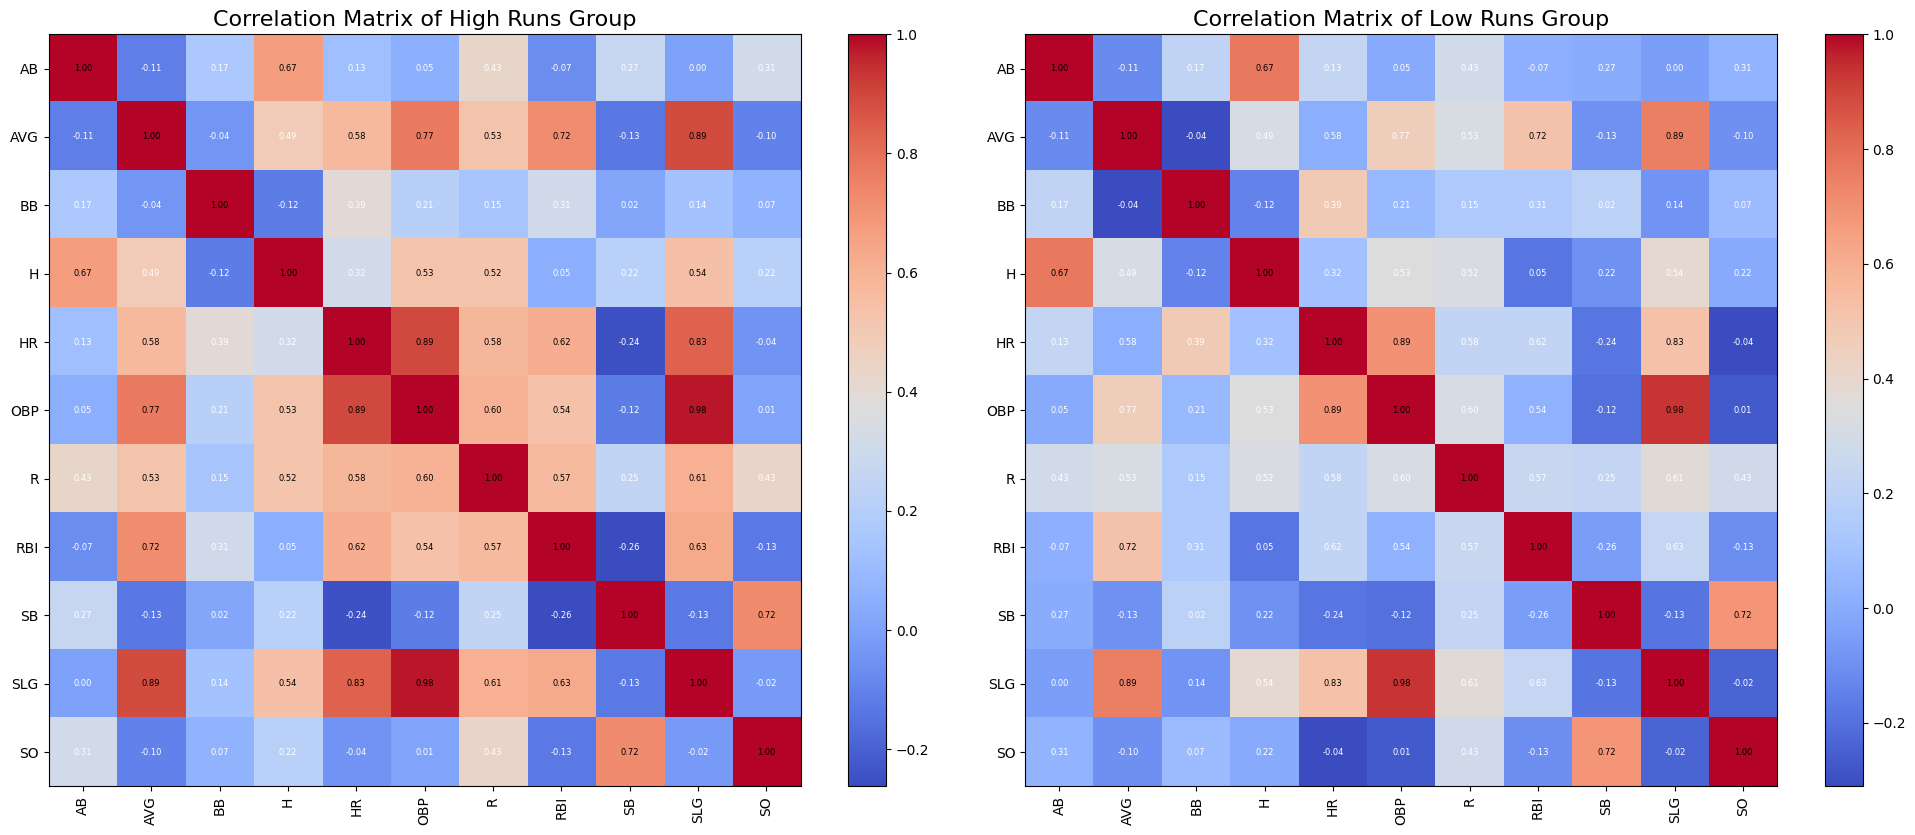

In [7]:
# TODO 4: 資料視覺化

# 要計算的欄位
numeric_cols = ['AB', 'AVG', 'BB', 'H', 'HR', 'OBP', 'R', 'RBI', 'SB', 'SLG', 'SO']

# 計算 correlation matrix
above_avg_cor_matrix = above_avg_df[numeric_cols].corr()
below_avg_cor_matrix = below_avg_df[numeric_cols].corr()

# 請將兩張圖娉排顯示。左邊是高得分組的 heatmap，右邊是低得分組
plt.figure(figsize=(20, 8))


plt.subplot(1,2,1) # 請設定子圖位置
# 繪製高得分組的 heatmap
plt.imshow(above_avg_cor_matrix, cmap='coolwarm',interpolation='nearest')
# 在每個格子上顯示相關系數
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = plt.text(j, i, f'{above_avg_cor_matrix.iloc[i, j]:.2f}',
                        ha='center', va='center', color='white' if above_avg_cor_matrix.iloc[i, j] < 0.5 else 'black',fontsize = 6)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix of High Runs Group', fontsize=16)


plt.subplot(1,2,2) # 請設定子圖位置
# 繪製低得分組的 heatmap
plt.imshow(below_avg_cor_matrix, cmap='coolwarm',interpolation='nearest')
# 在每個格子上顯示相關系數
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = plt.text(j, i, f'{above_avg_cor_matrix.iloc[i, j]:.2f}',
                        ha='center', va='center', color='white' if below_avg_cor_matrix.iloc[i, j] < 0.5 else 'black',fontsize = 6)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix of Low Runs Group', fontsize=16)

plt.tight_layout()
plt.show()

## 你的解讀
請回下列問題（直接將回答寫在這個 cell）

### Q1: 影響「高得分組」球員得分（Runs, R）較多的得分指標，和影響影響「低得分組」較多的指標一樣嗎？
就肉眼觀察來看，可以發現高得分組的熱圖中出現暖色系的格子(高相關性)比低得分組的多。
因此，可以斷言影響兩者的得分數量不一樣

### Q2: 從這兩者的差距中，你觀察到了什麼、會如何解讀這樣的差距呢？（例如，你能說出影響球員是否會成為高得分球員的關鍵因素嗎？）
球員能獲得較高的分數自然表示他的其他能力也相對較好。正相關就會更多，因此就自然產生了差距